# Logistic Regression for Classification



## Objectives

*   Use Logistic Regression to classify data


Let's load required libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline

### About the dataset
Dataset from Davide Chicco, Giuseppe Jurman: â€œMachine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)

Import the dataset
This dataset was hosted on Kaggle. Click <a href="https://www.kaggle.com/datasets/sagar029/heart-failure?select=heart_failure.csv">HERE</a>.

In [18]:
df = pd.read_csv("C:/Users/17018/OneDrive - Nigerian National Petroleum Corporation/Desktop/IBM Data Science/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [19]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [20]:
df.shape

(299, 13)

In [21]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Cleaning The Data

In [23]:
# Missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [24]:
# Check for dupicate
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool

#### Inspecting our columns

In [25]:
Cols = df.columns.drop("DEATH_EVENT")
Cols

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

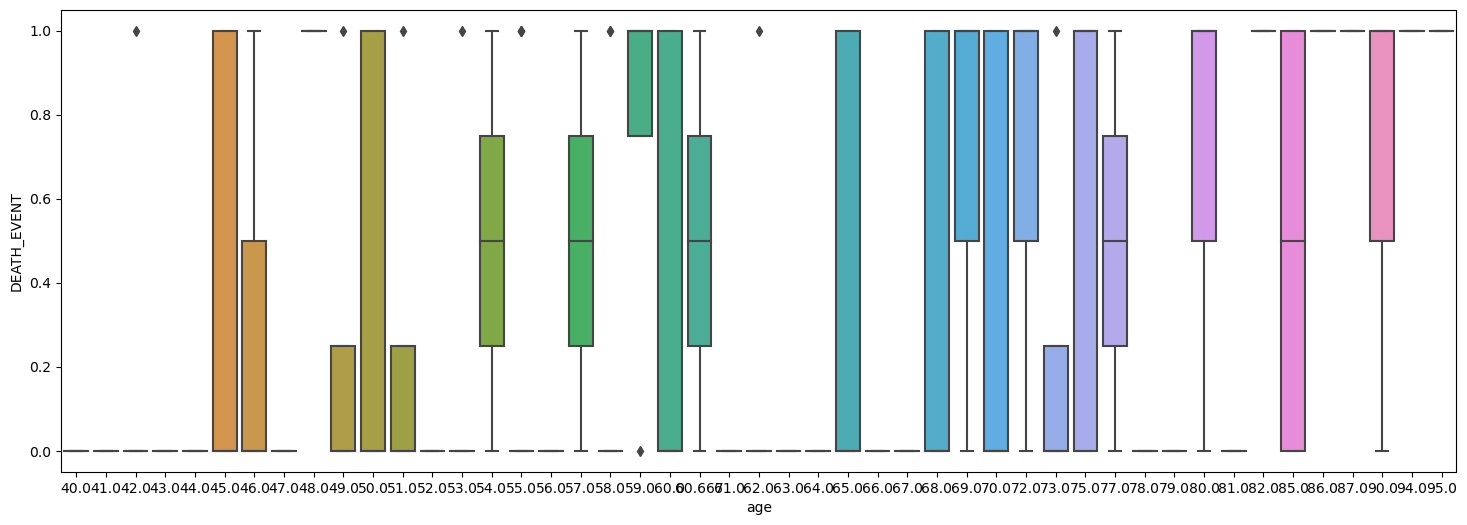

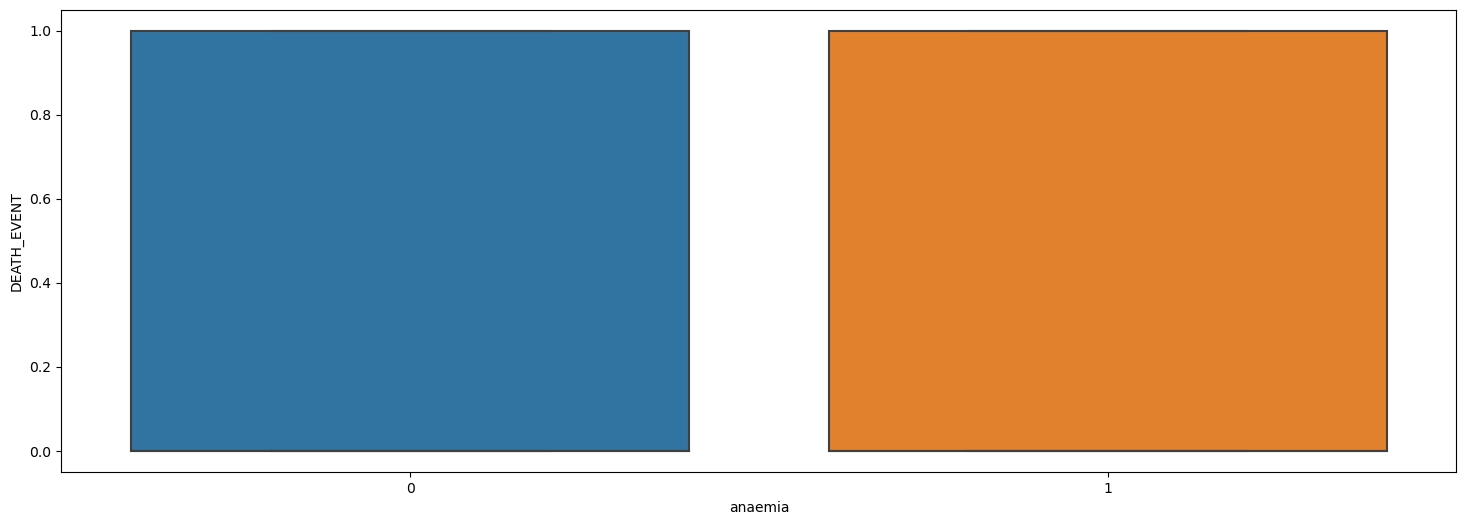

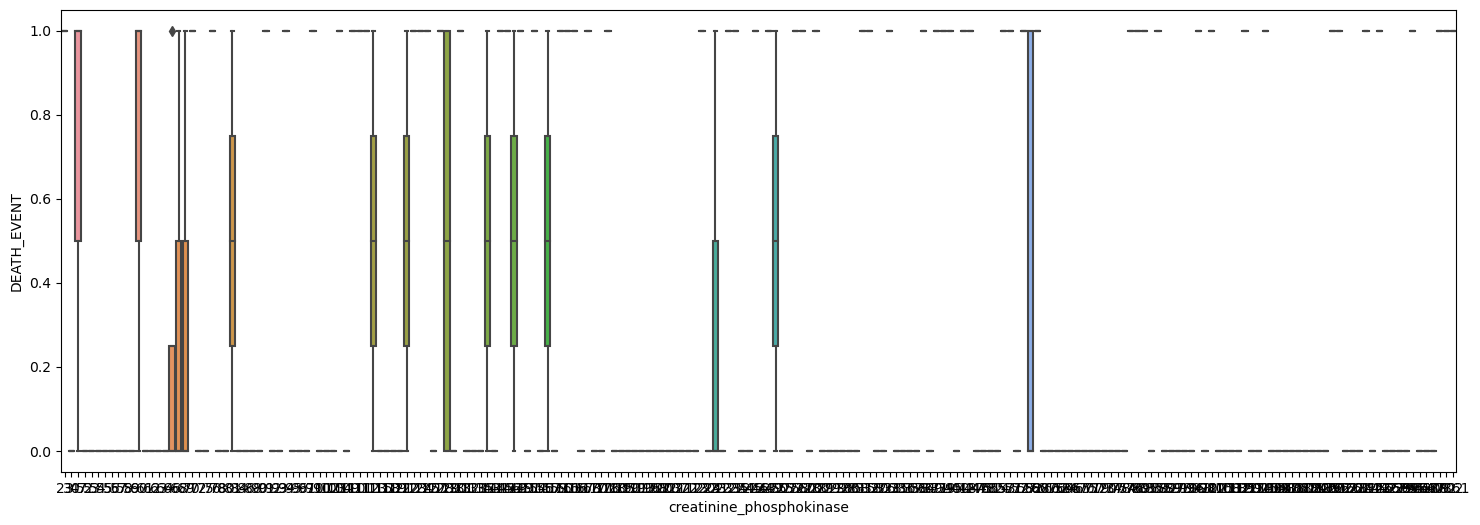

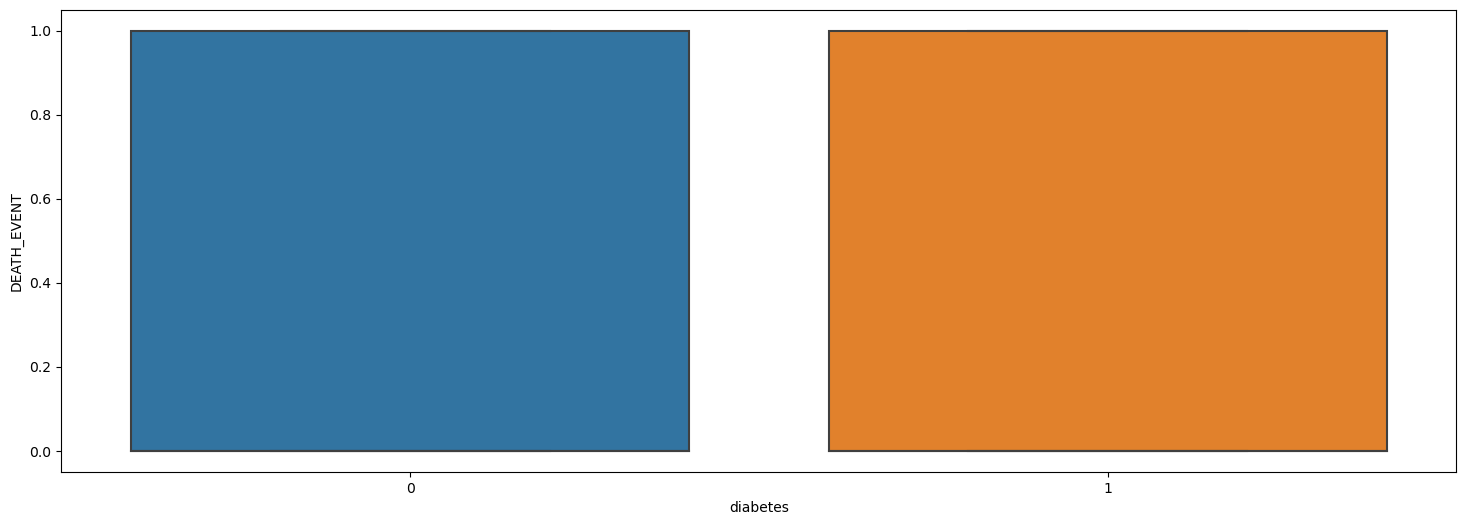

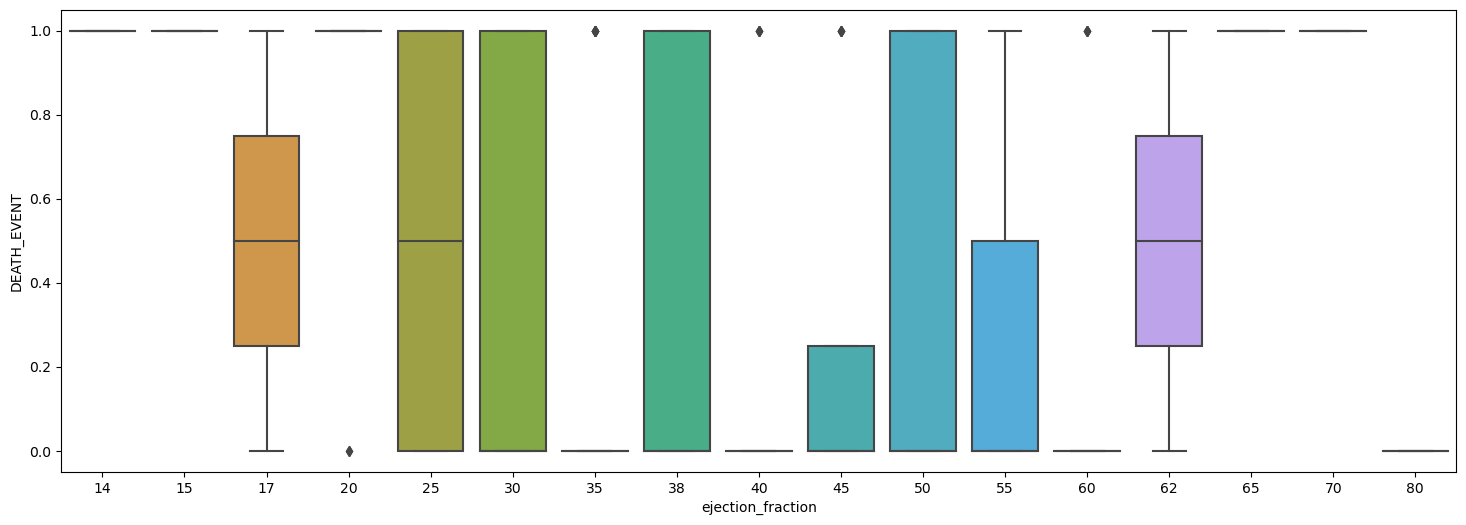

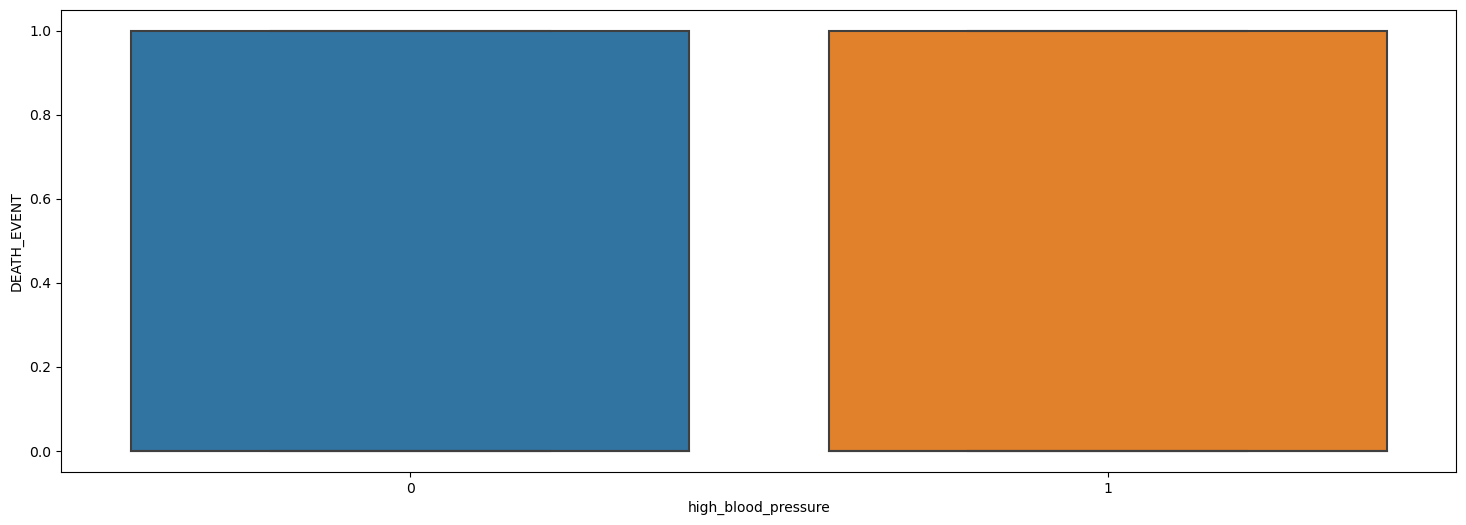

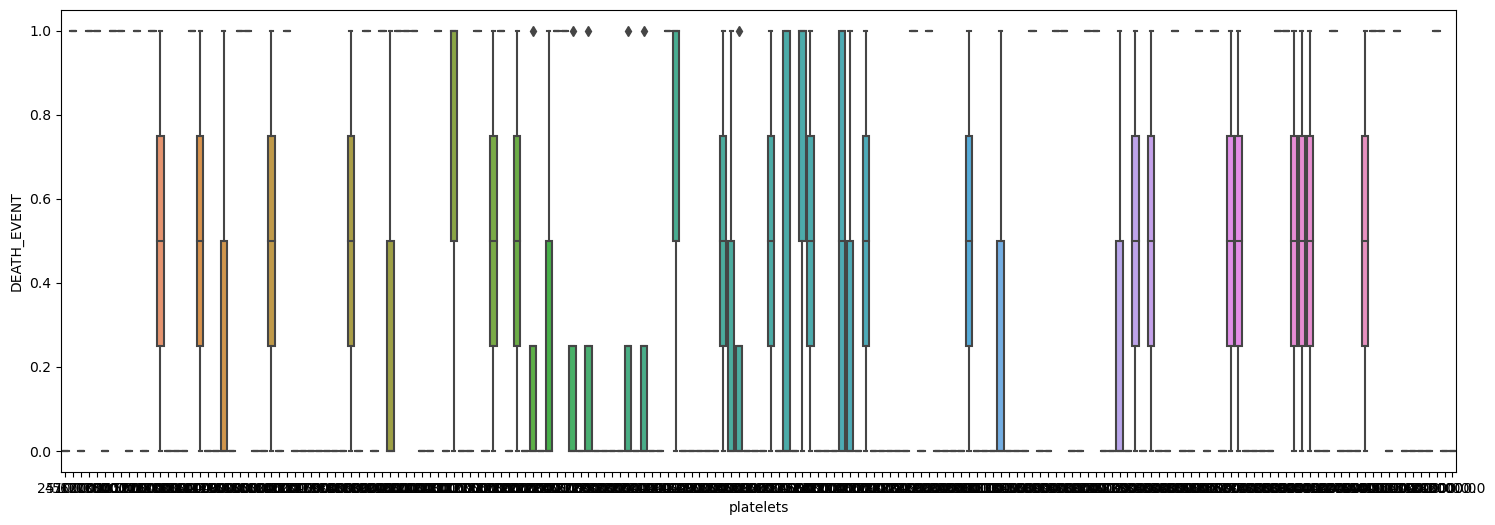

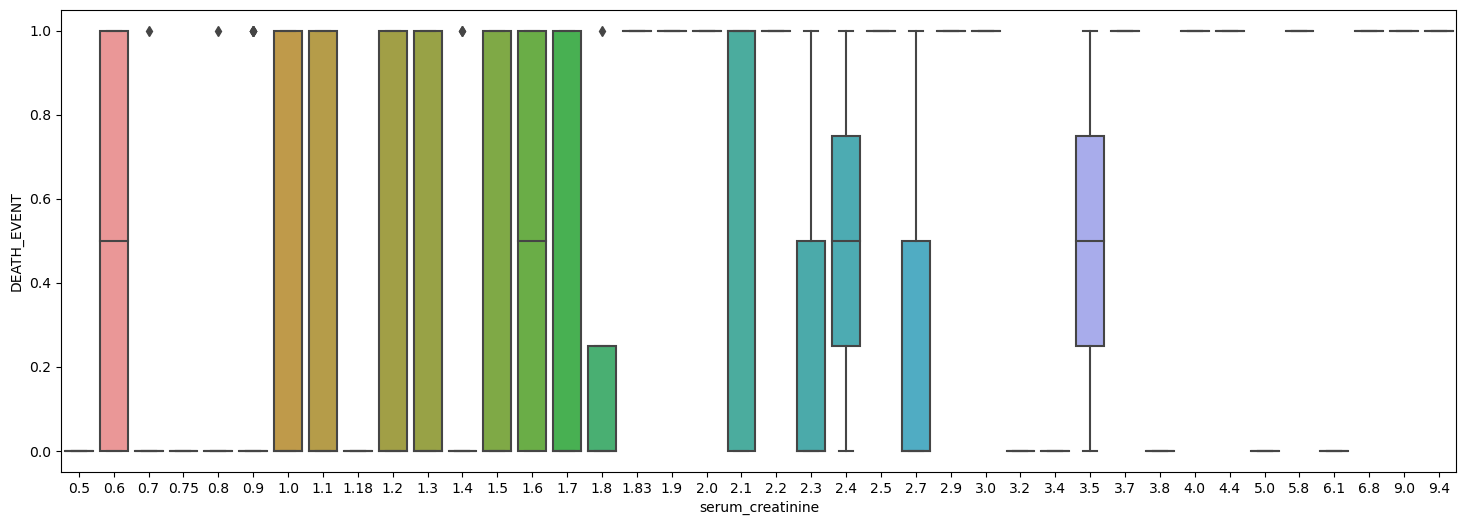

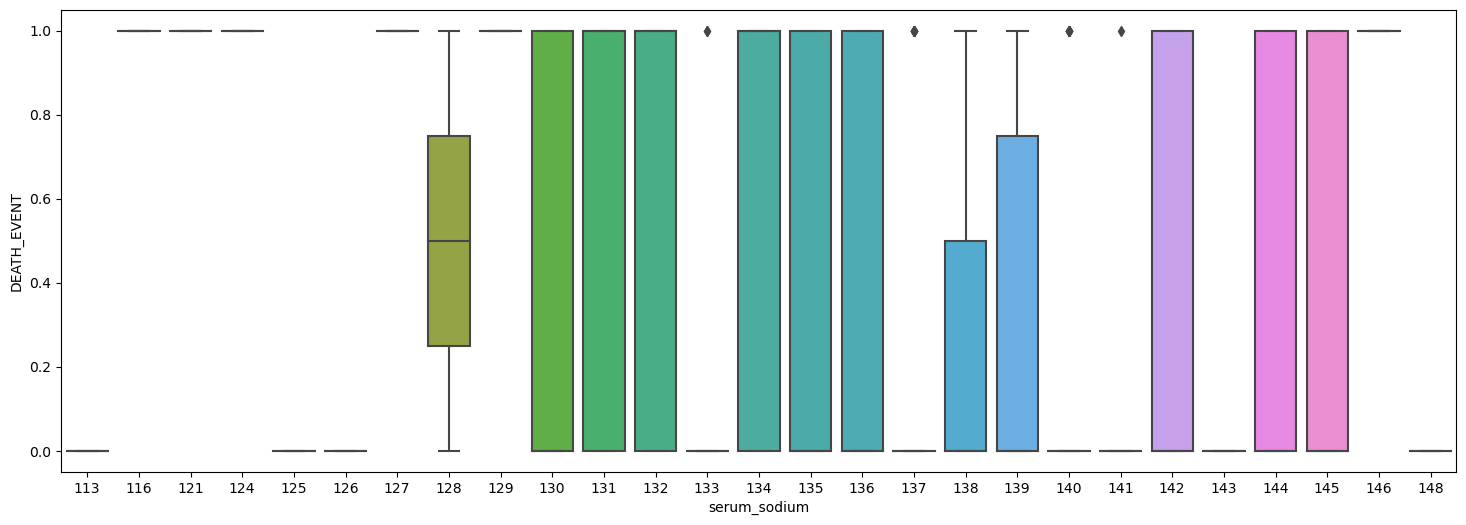

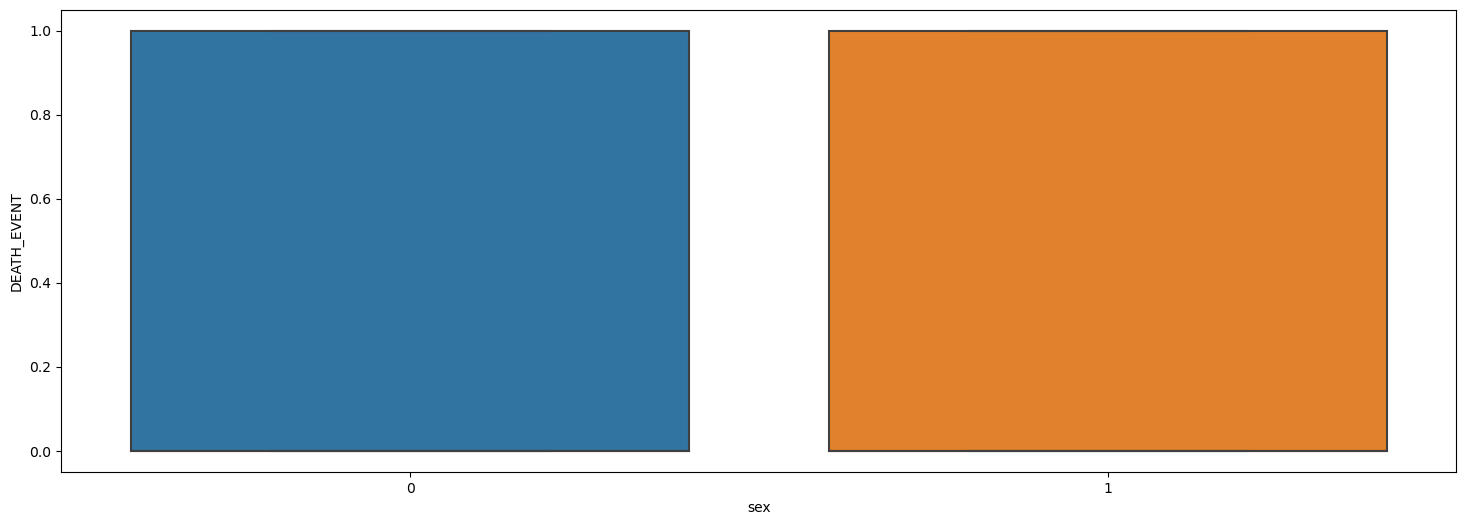

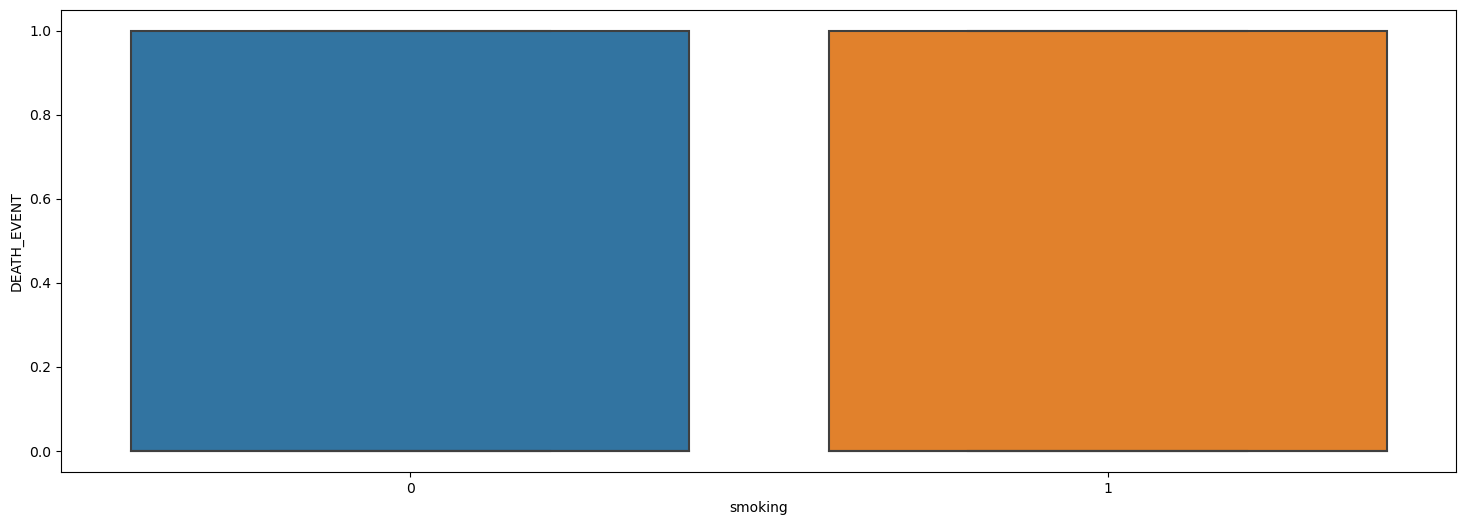

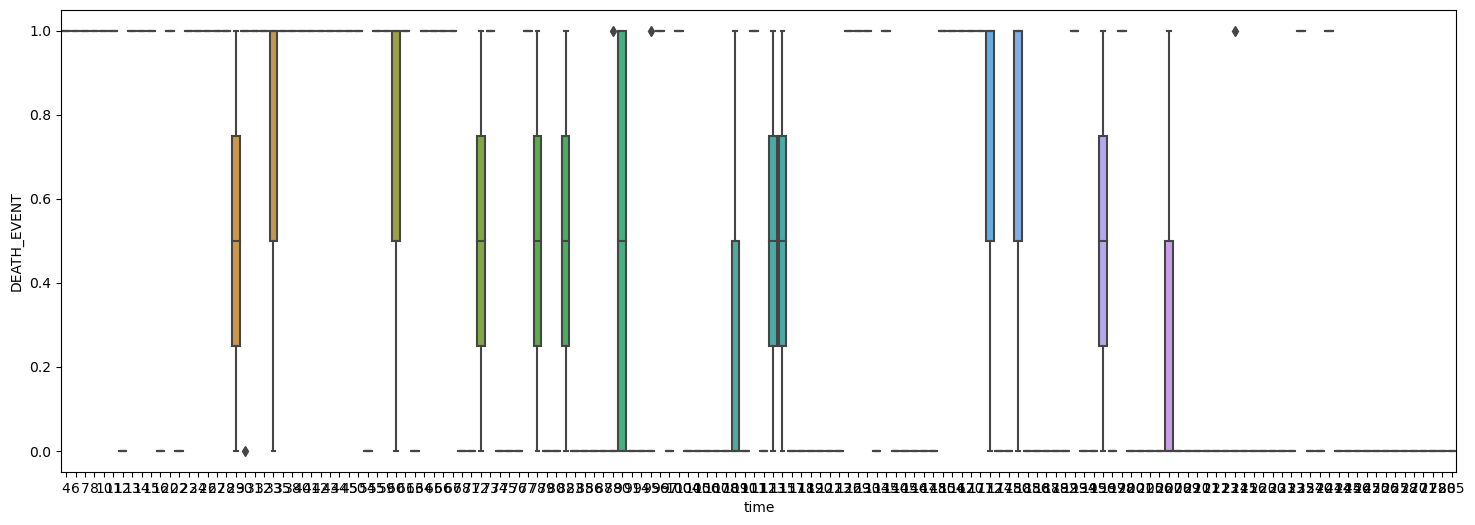

In [26]:
for col in Cols:
    plt.figure(figsize=(18,6))
    sns.boxplot(x=col, y="DEATH_EVENT", data=df)
    plt.show()

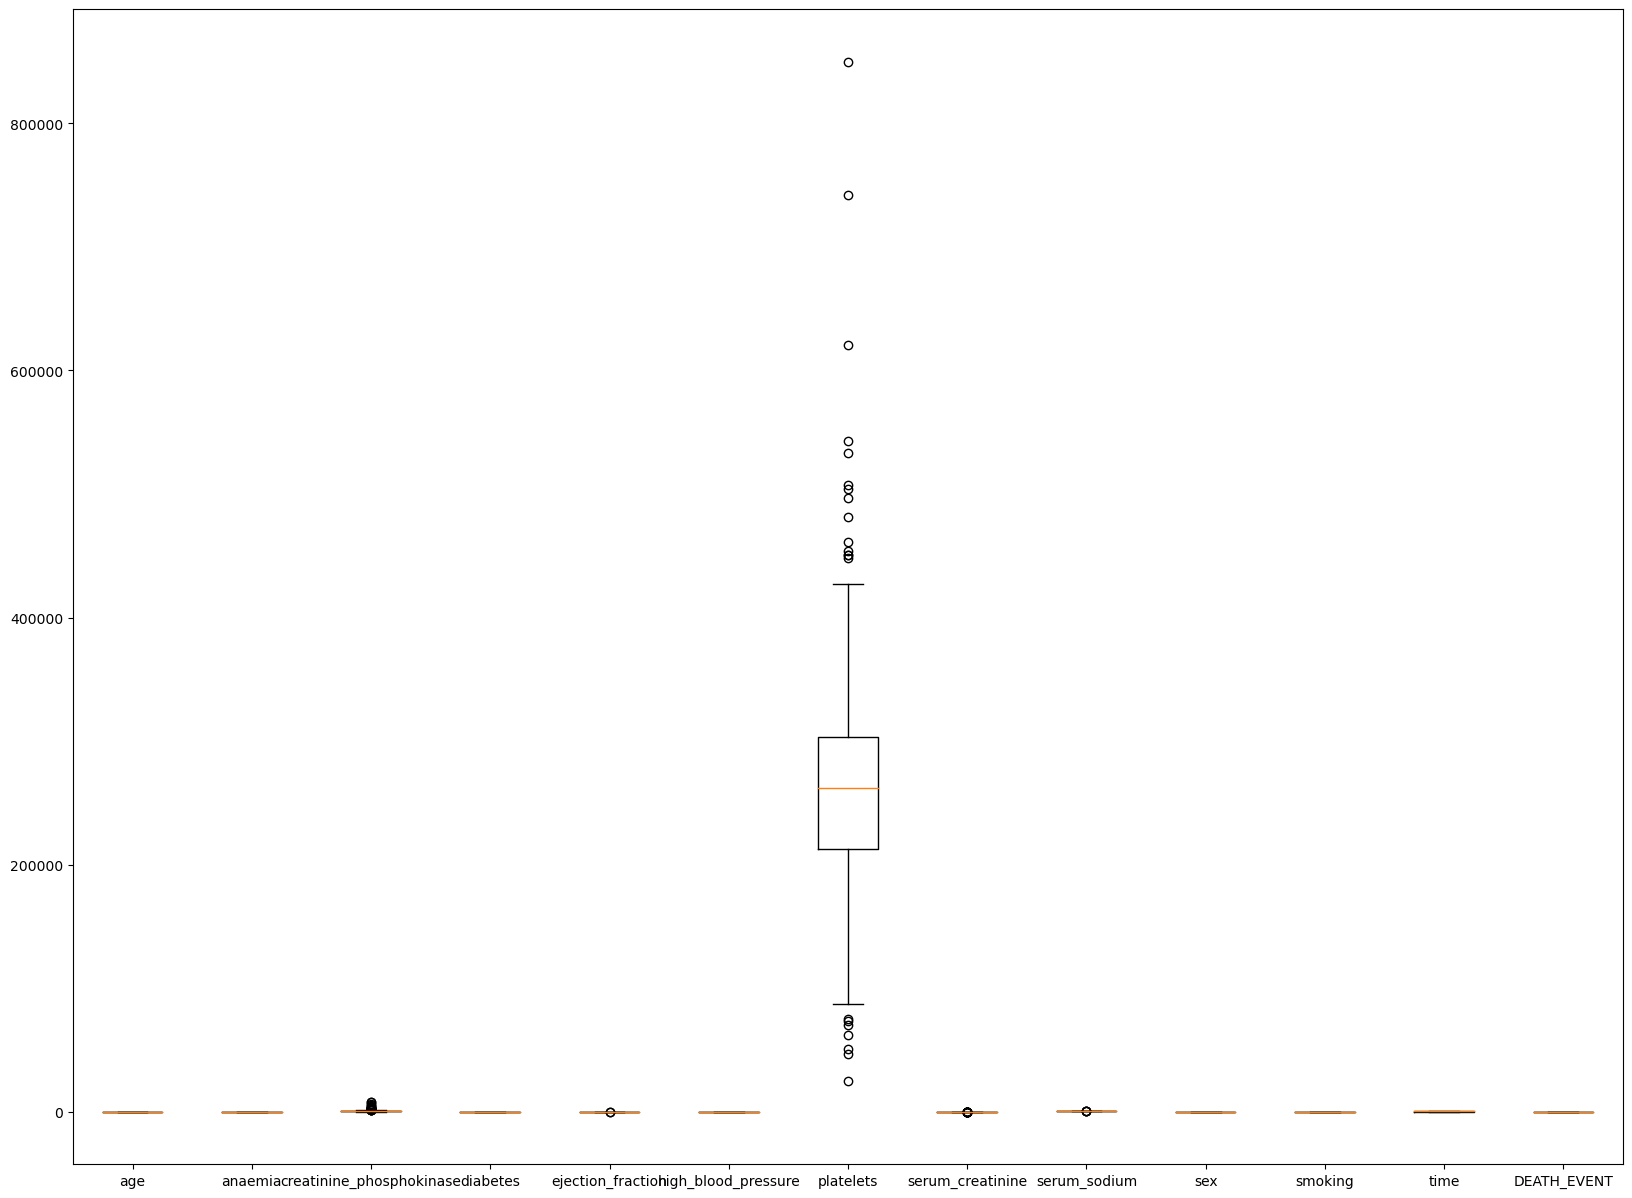

In [27]:
# Outliers values
plt.figure(figsize=(20, 15))
plt.boxplot(df, labels=df.columns)
plt.show()

### Creatinine phosphokinase column

In [28]:
df['creatinine_phosphokinase'].describe()

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

Text(0.5, 1.0, 'Outliers values')

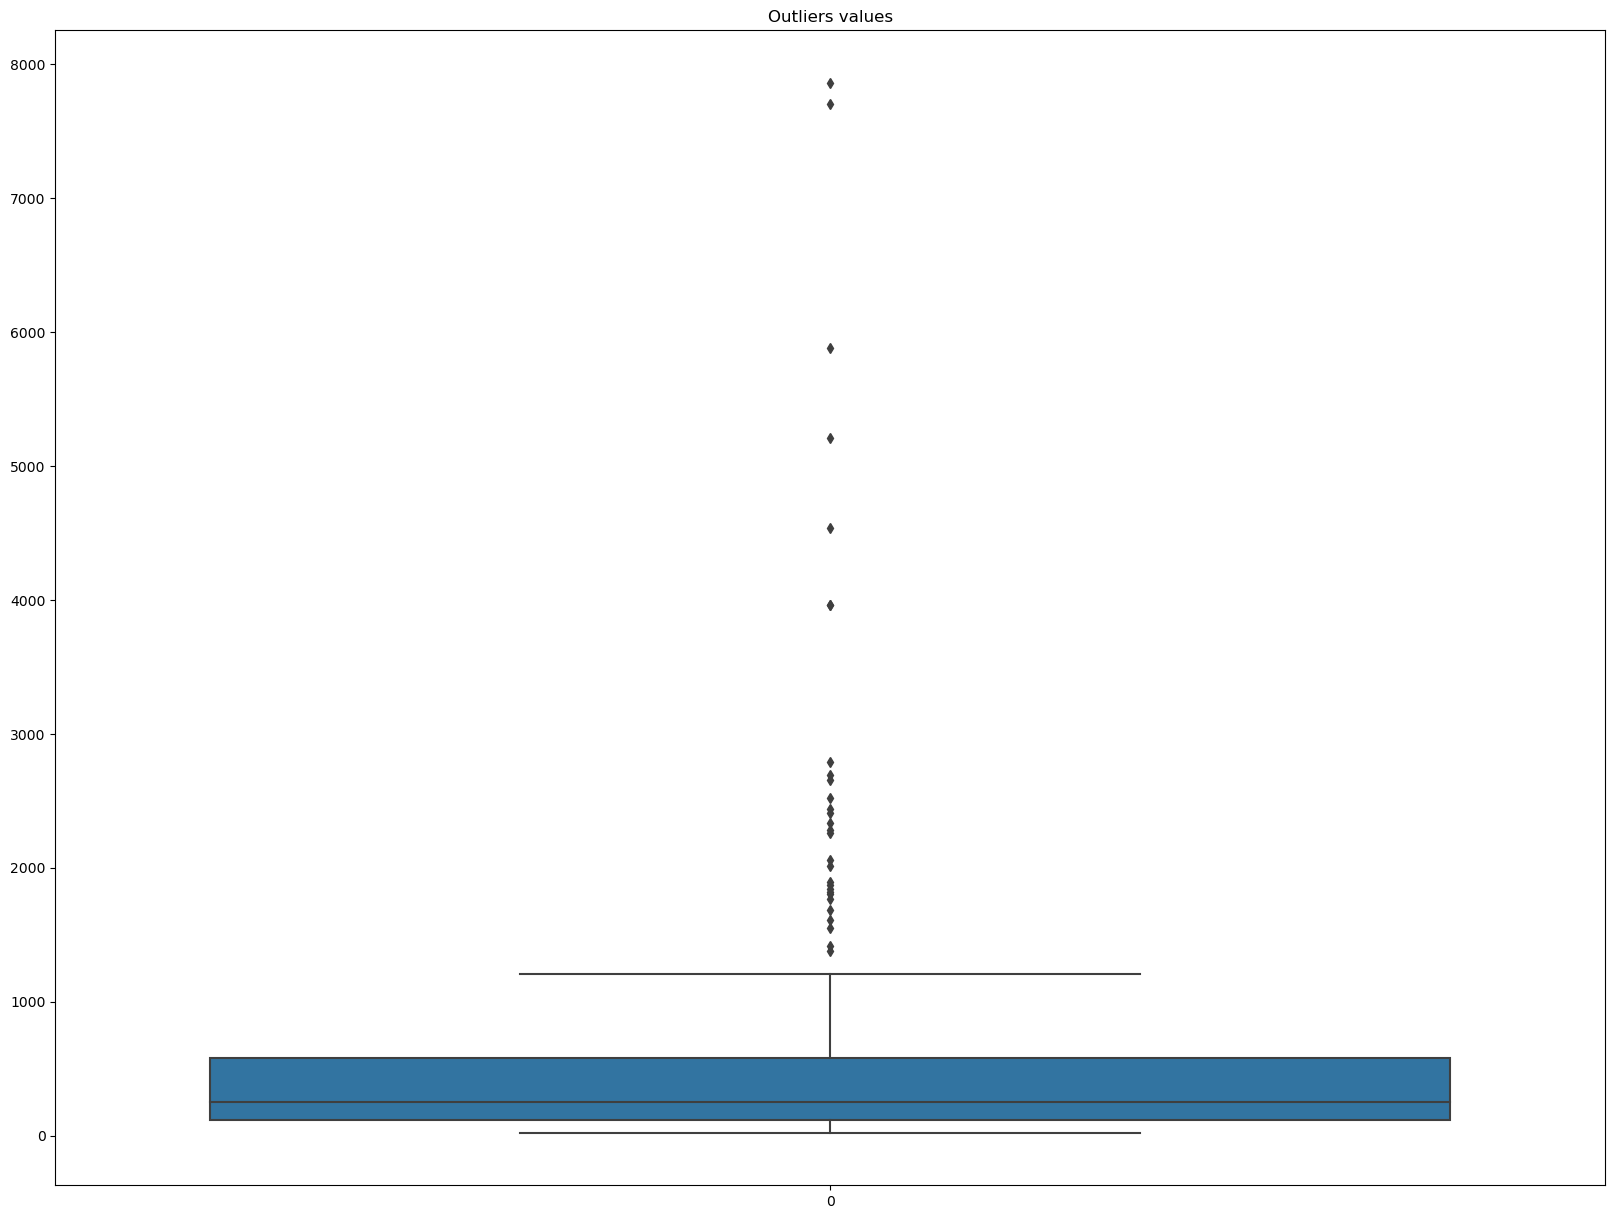

In [29]:
plt.figure(figsize=(20, 15))
sns.boxplot(df['creatinine_phosphokinase'], labels=['Creatinine Phosphokinase'])
plt.title('Outliers values')

In [30]:
def clean_data(data,col='column_name'):
    
    '''Takes a Dataframe column and remove outliers by replacing the outliers greater than maximum 
    with the maximum and outliers lower than the minimum with the minimum
    
    
        Parameters:
            data (2d array): Pandas Dataframe column
    
            col (str) : The Dataframe Column name
    
        Returns:
            Cleaned column: Description of return value
    
    '''
    
    import numpy as np
    import pandas as pd
    import seaborn as sns
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3 - q1

    min = q1 - 1.5*(iqr)
    max = q3 + 1.5*(iqr)
    
    for i in data.index:
        if data.loc[i, col] > max:
            data.loc[i, col] = max
        if data.loc[i, col] < min:
            data.loc[i, col] = min
    plt.figure(figsize=(20, 15))        
    sns.boxplot(data[col],orient='v')
    plt.title(f'Cleaned {col} column')
    plt.show()

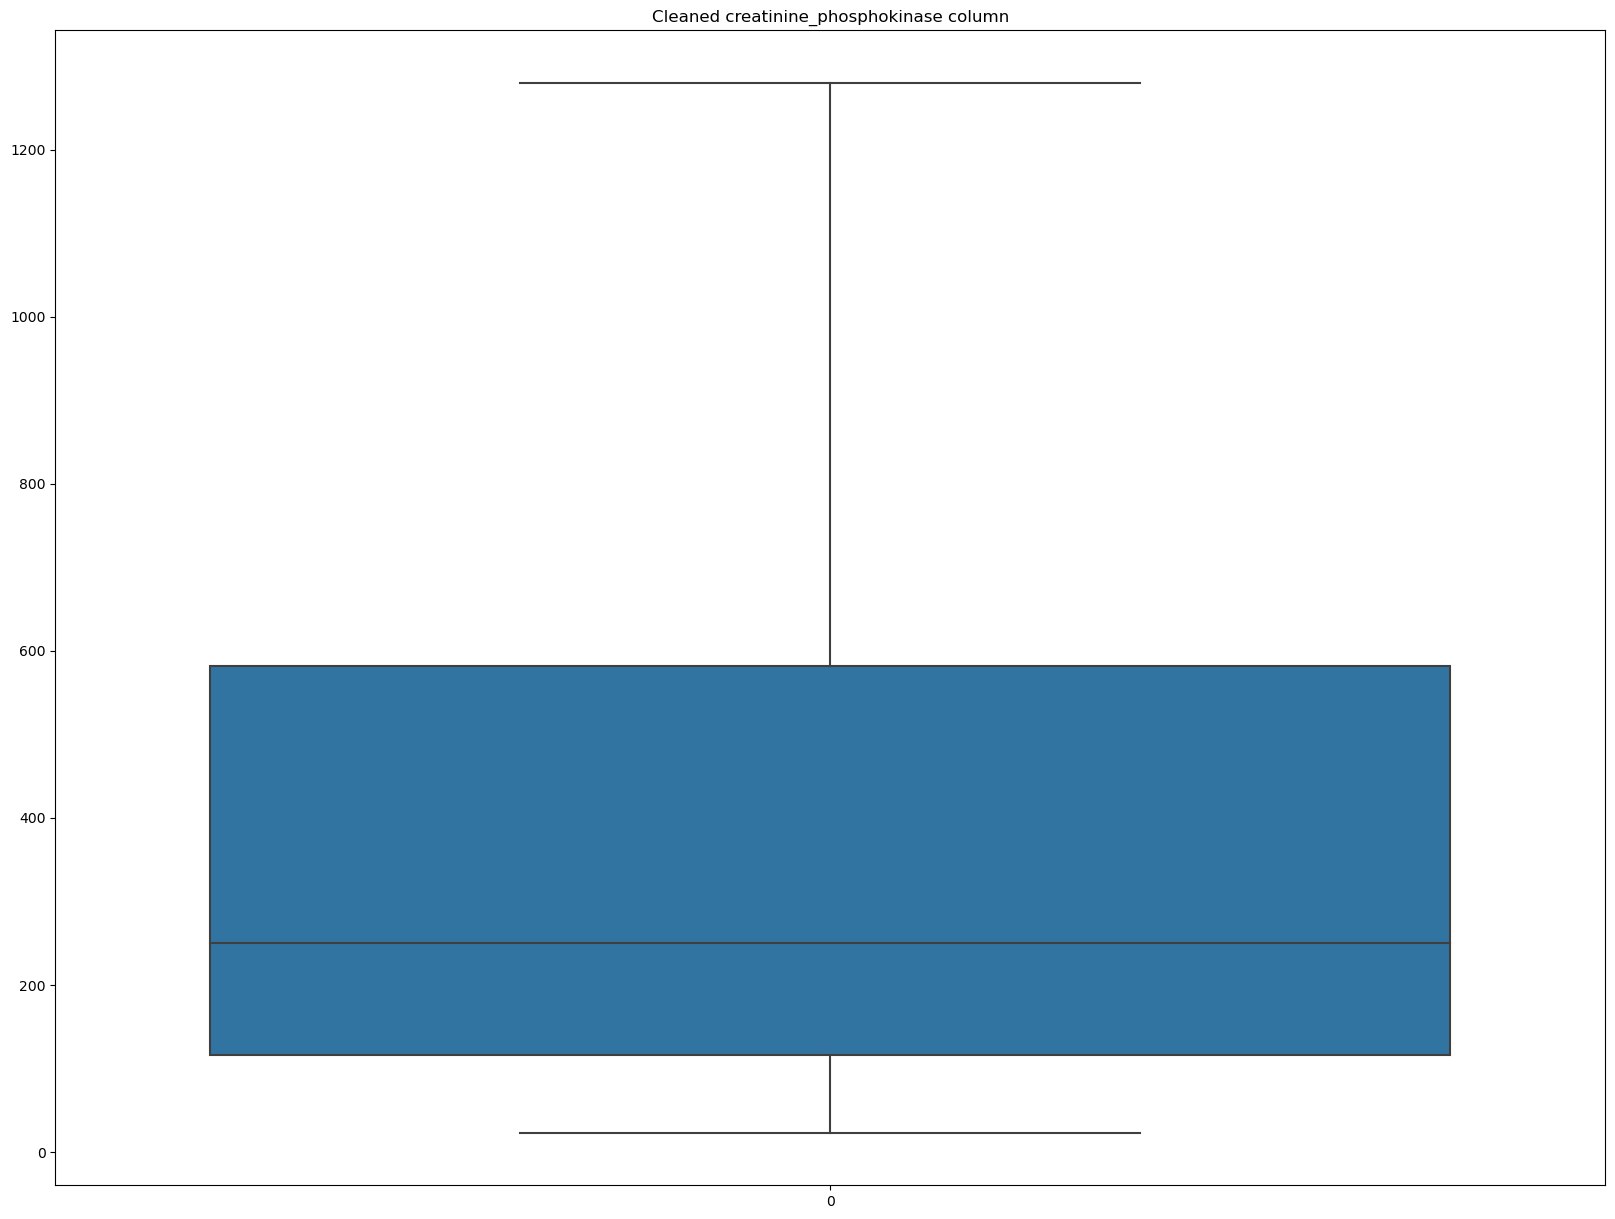

In [31]:
clean_data(df, 'creatinine_phosphokinase')

In [32]:
df['ejection_fraction'].describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

Text(0.5, 1.0, 'Outliers values')

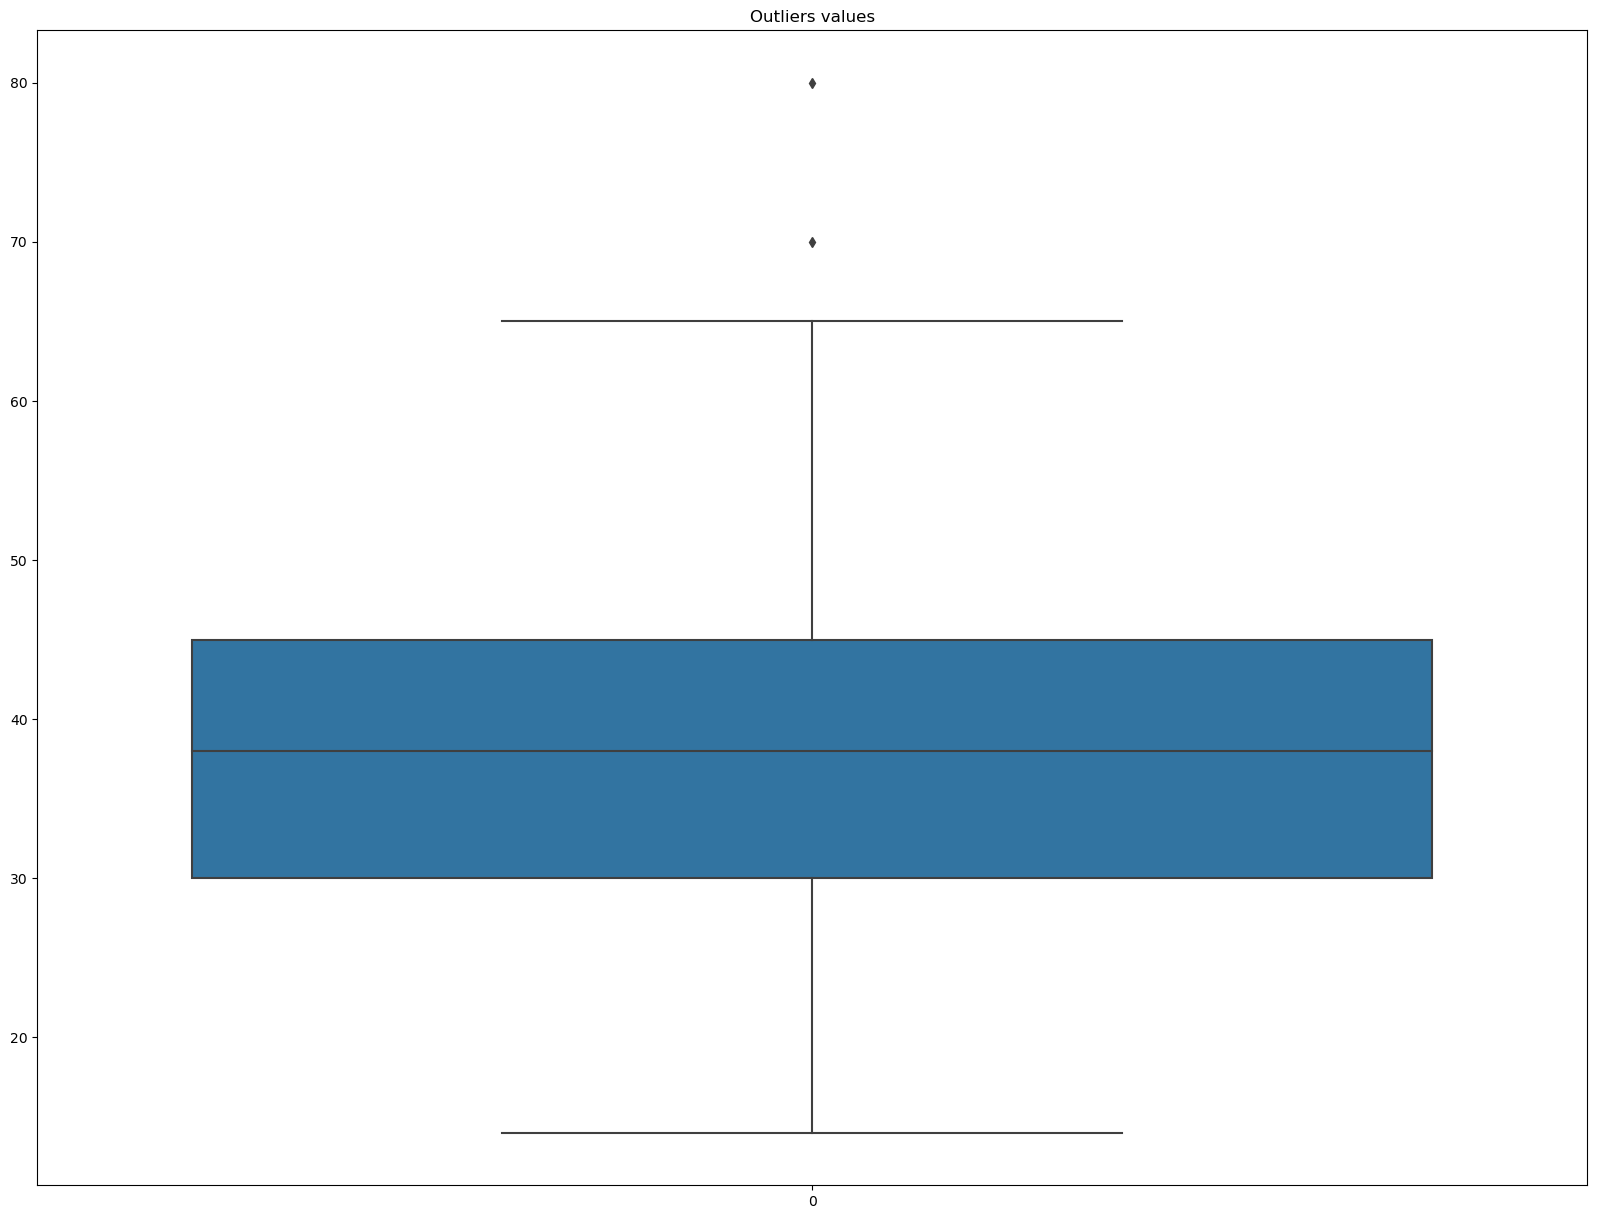

In [33]:
plt.figure(figsize=(20, 15))
sns.boxplot(df['ejection_fraction'], labels=['Ejection fraction'])
plt.title('Outliers values')

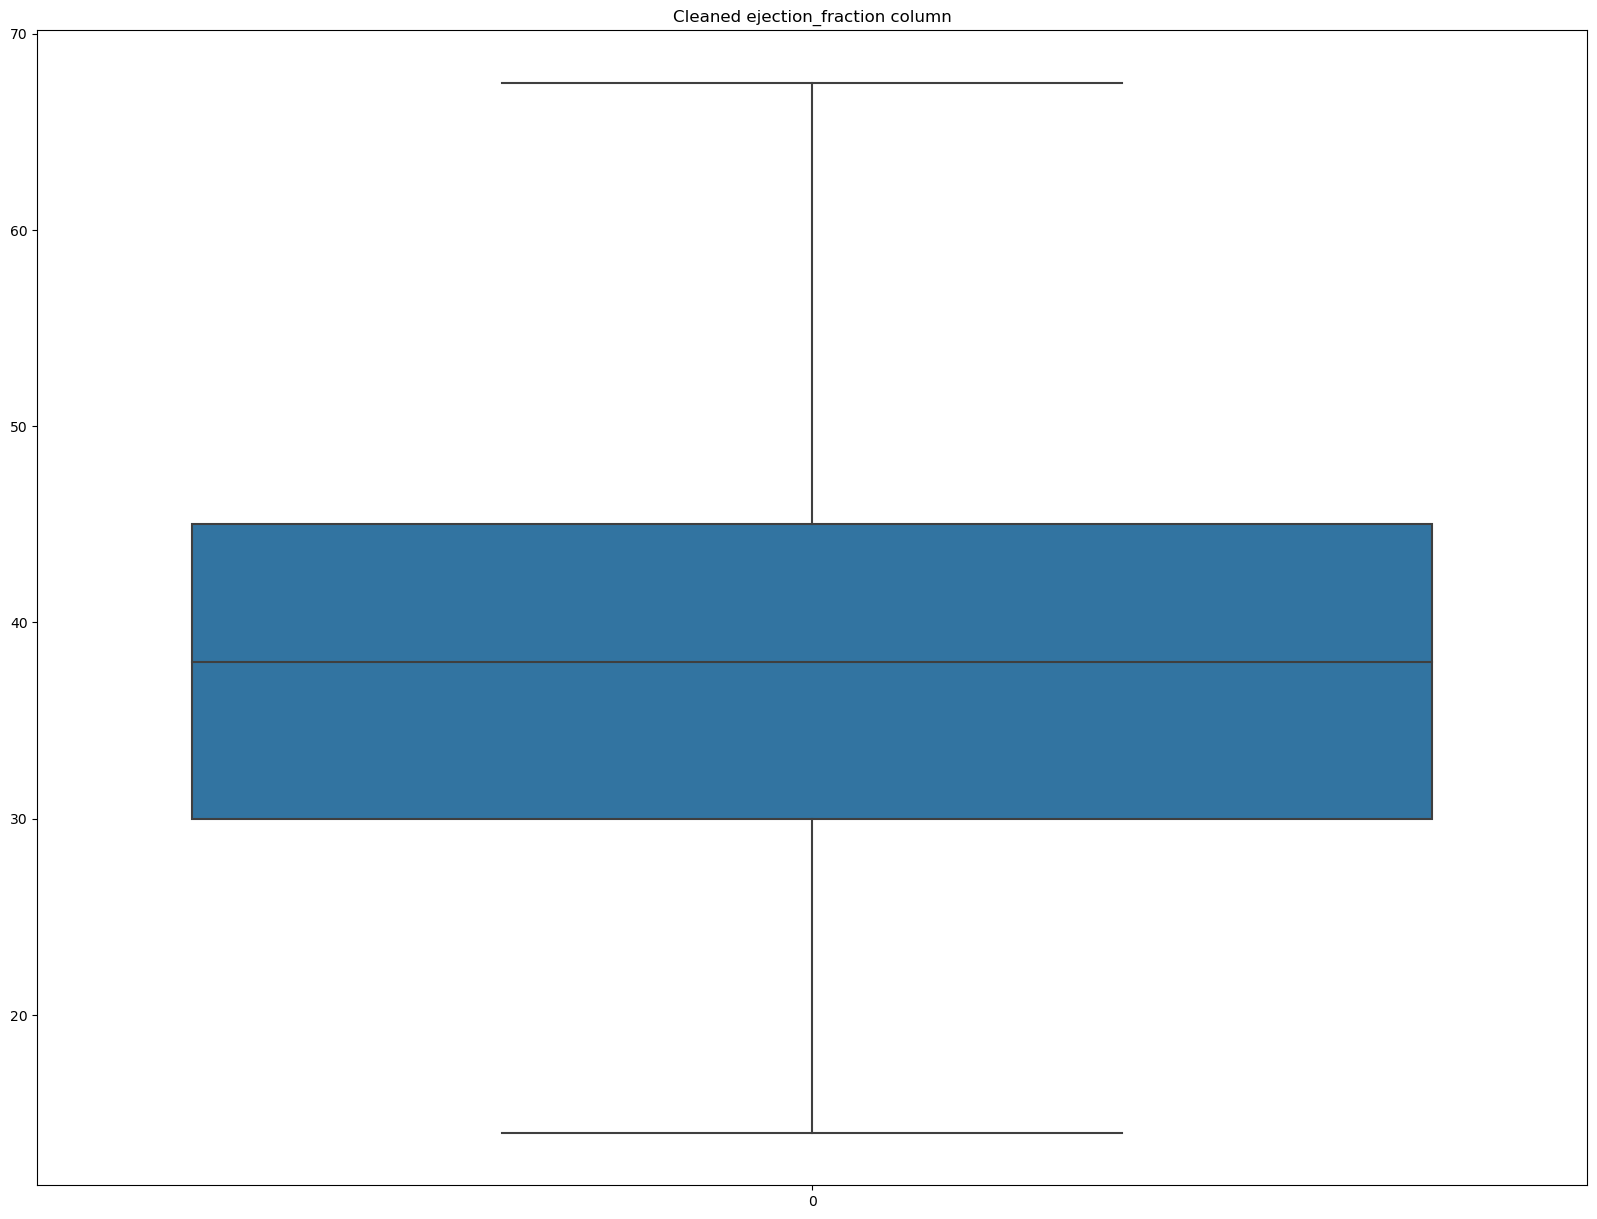

In [34]:
clean_data(df, 'ejection_fraction')

In [35]:
df['platelets'].describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

Text(0.5, 1.0, 'Outliers values')

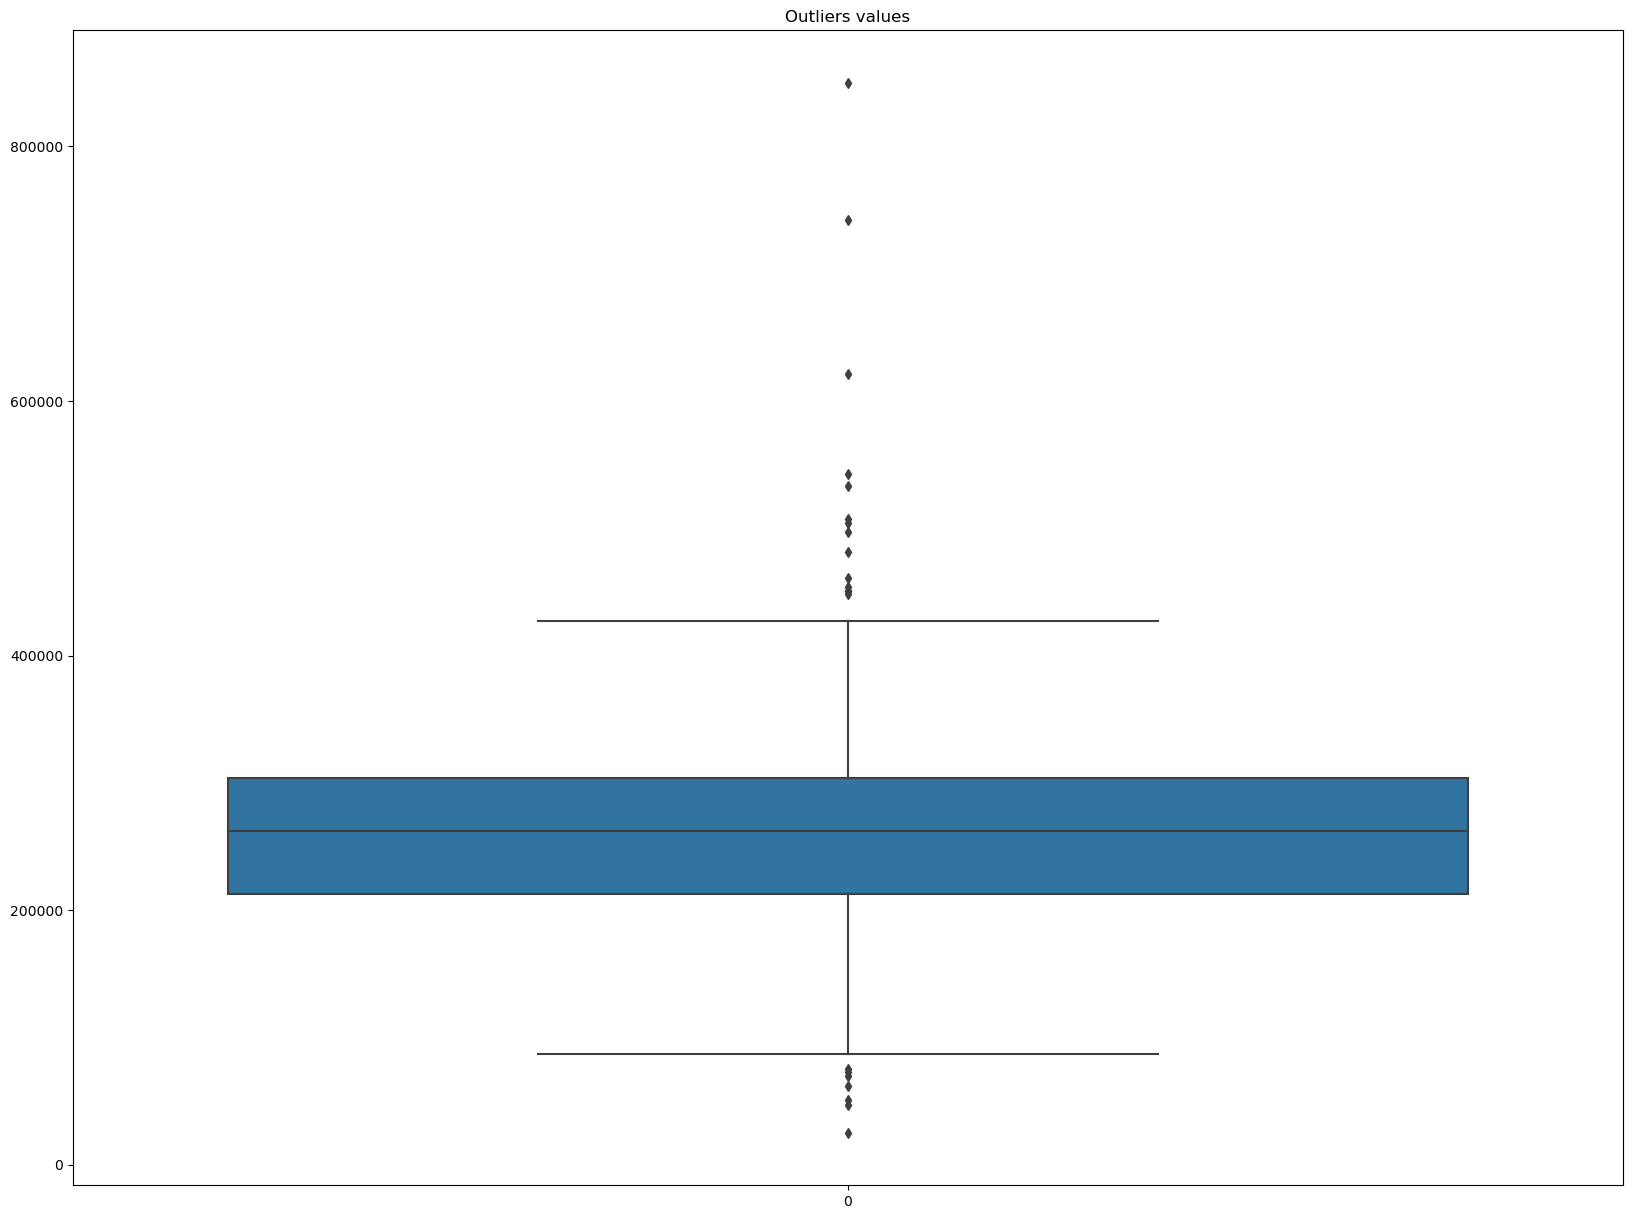

In [36]:
plt.figure(figsize=(20, 15))
sns.boxplot(df['platelets'], labels=['platelets'])
plt.title('Outliers values')

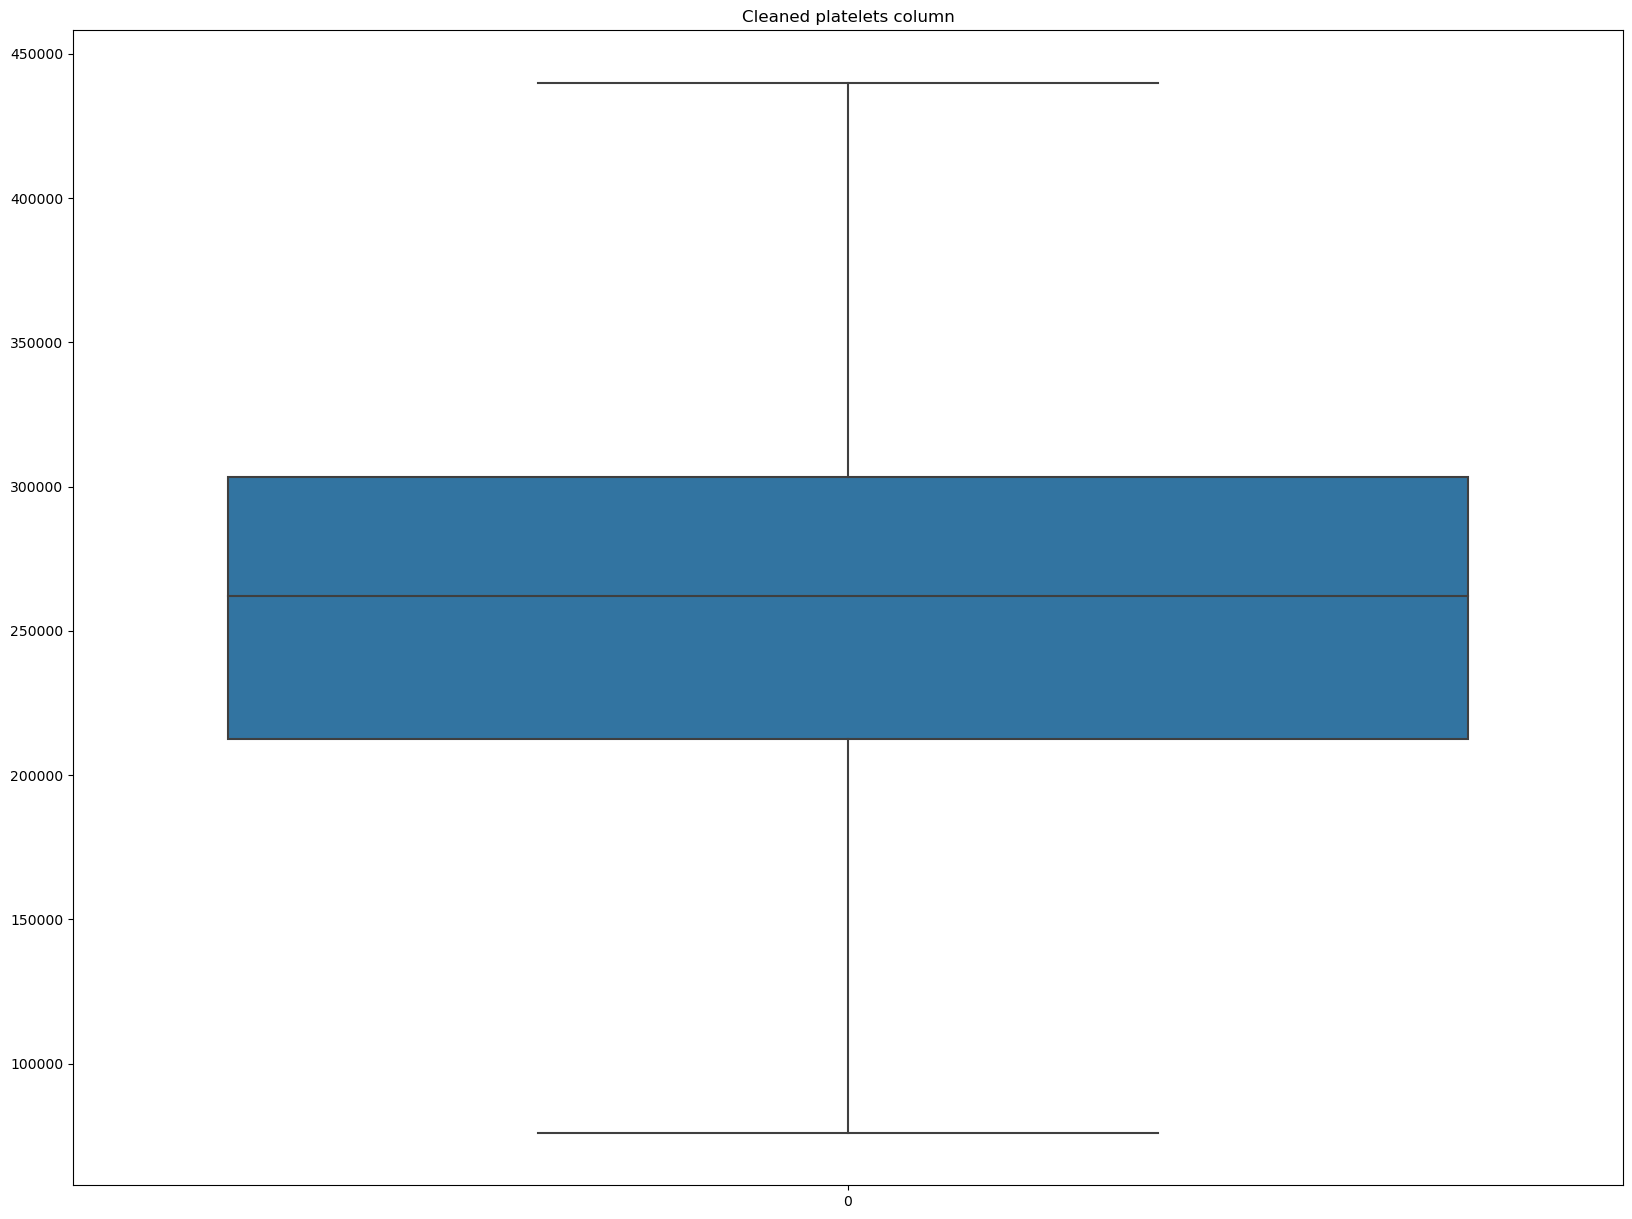

In [37]:
clean_data(df, 'platelets')

In [38]:
df['serum_creatinine'].describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

Text(0.5, 1.0, 'Outliers values')

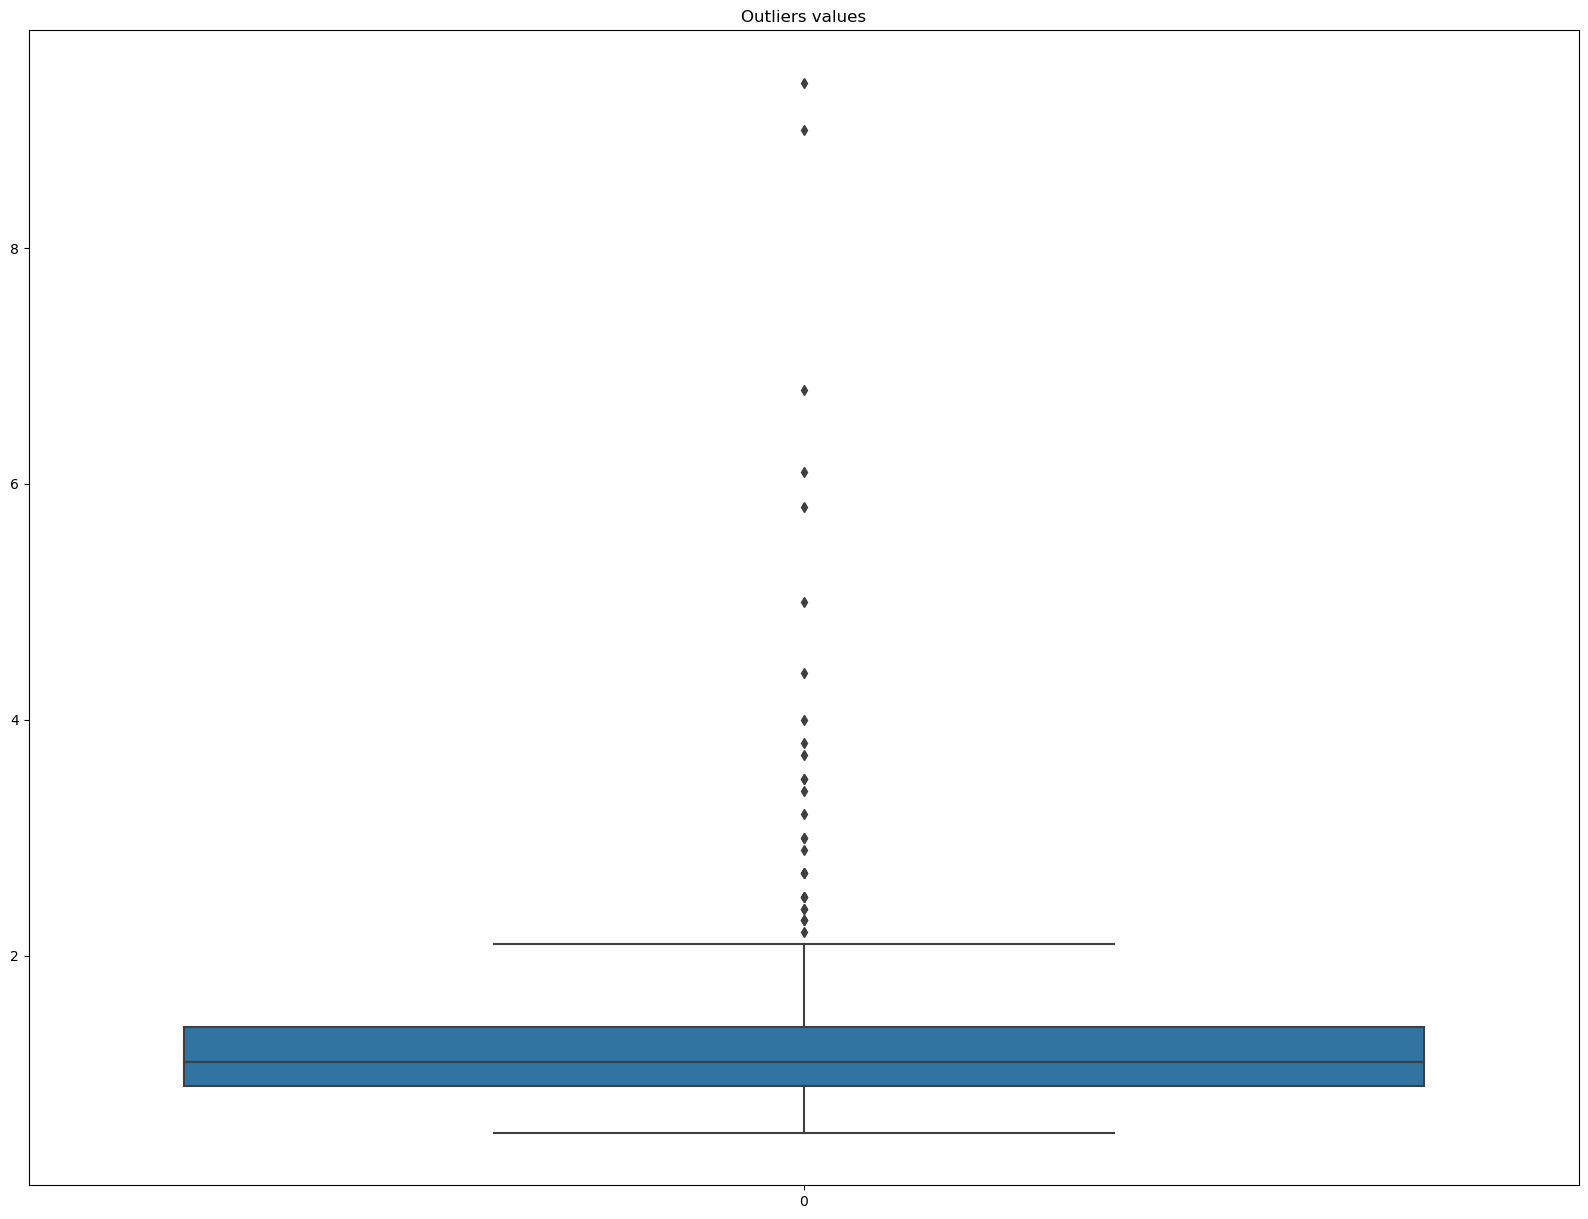

In [39]:
plt.figure(figsize=(20, 15))
sns.boxplot(df['serum_creatinine'], labels=['Serum creatinine'])
plt.title('Outliers values')

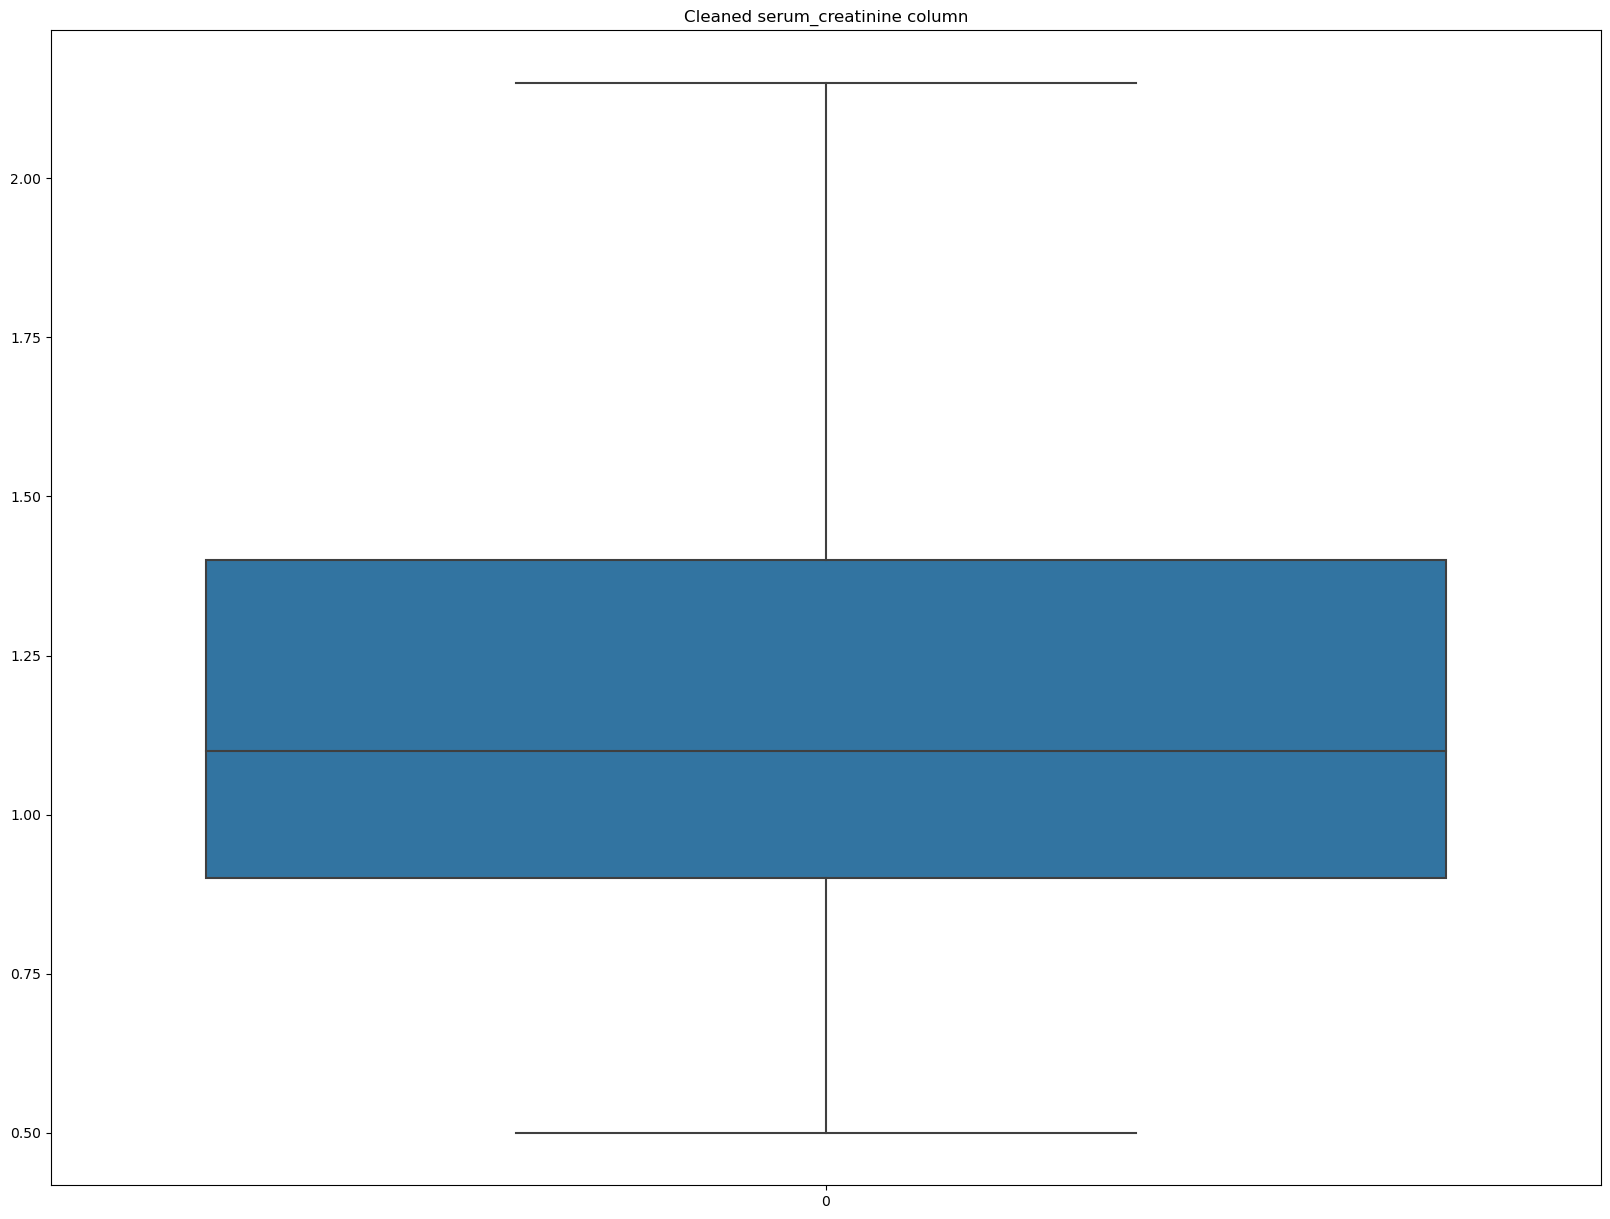

In [40]:
clean_data(df, 'serum_creatinine')

In [41]:
df.serum_sodium.describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

Text(0.5, 1.0, 'Outliers values')

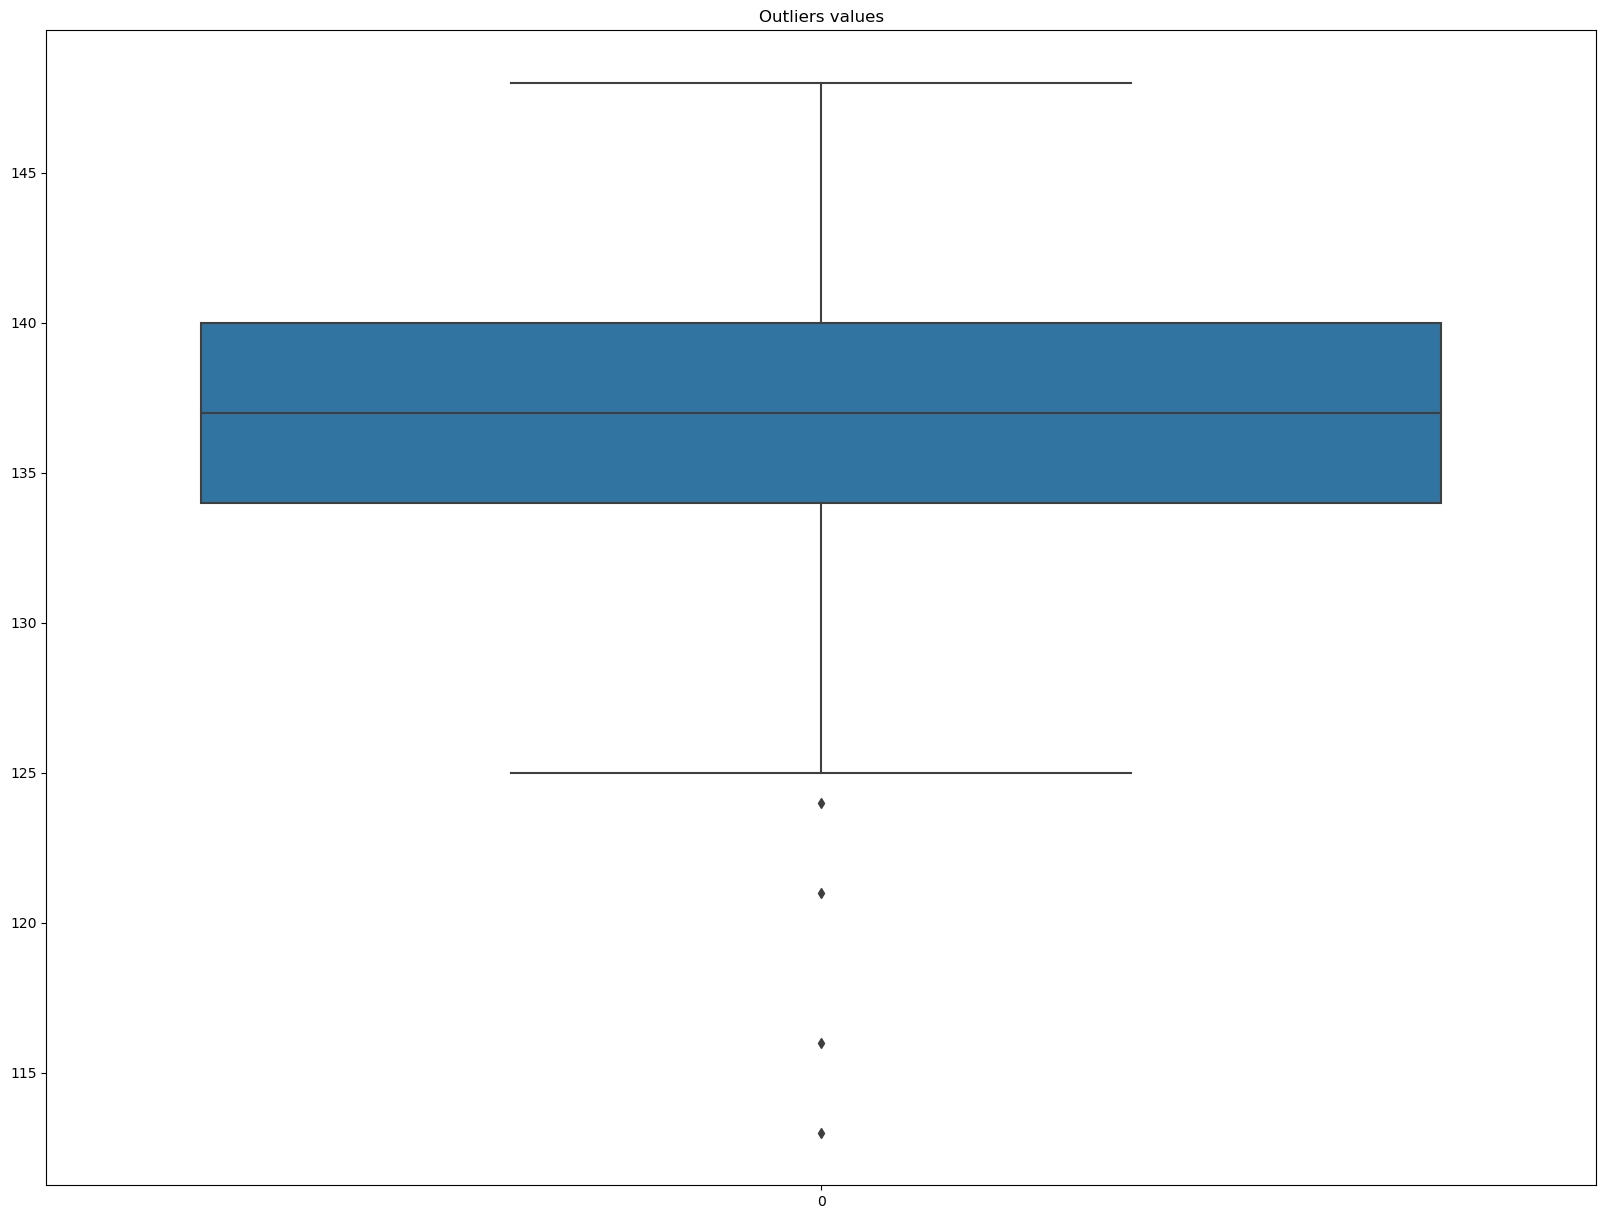

In [42]:
plt.figure(figsize=(20, 15))
sns.boxplot(df['serum_sodium'], labels=['Serum sodium'])
plt.title('Outliers values')

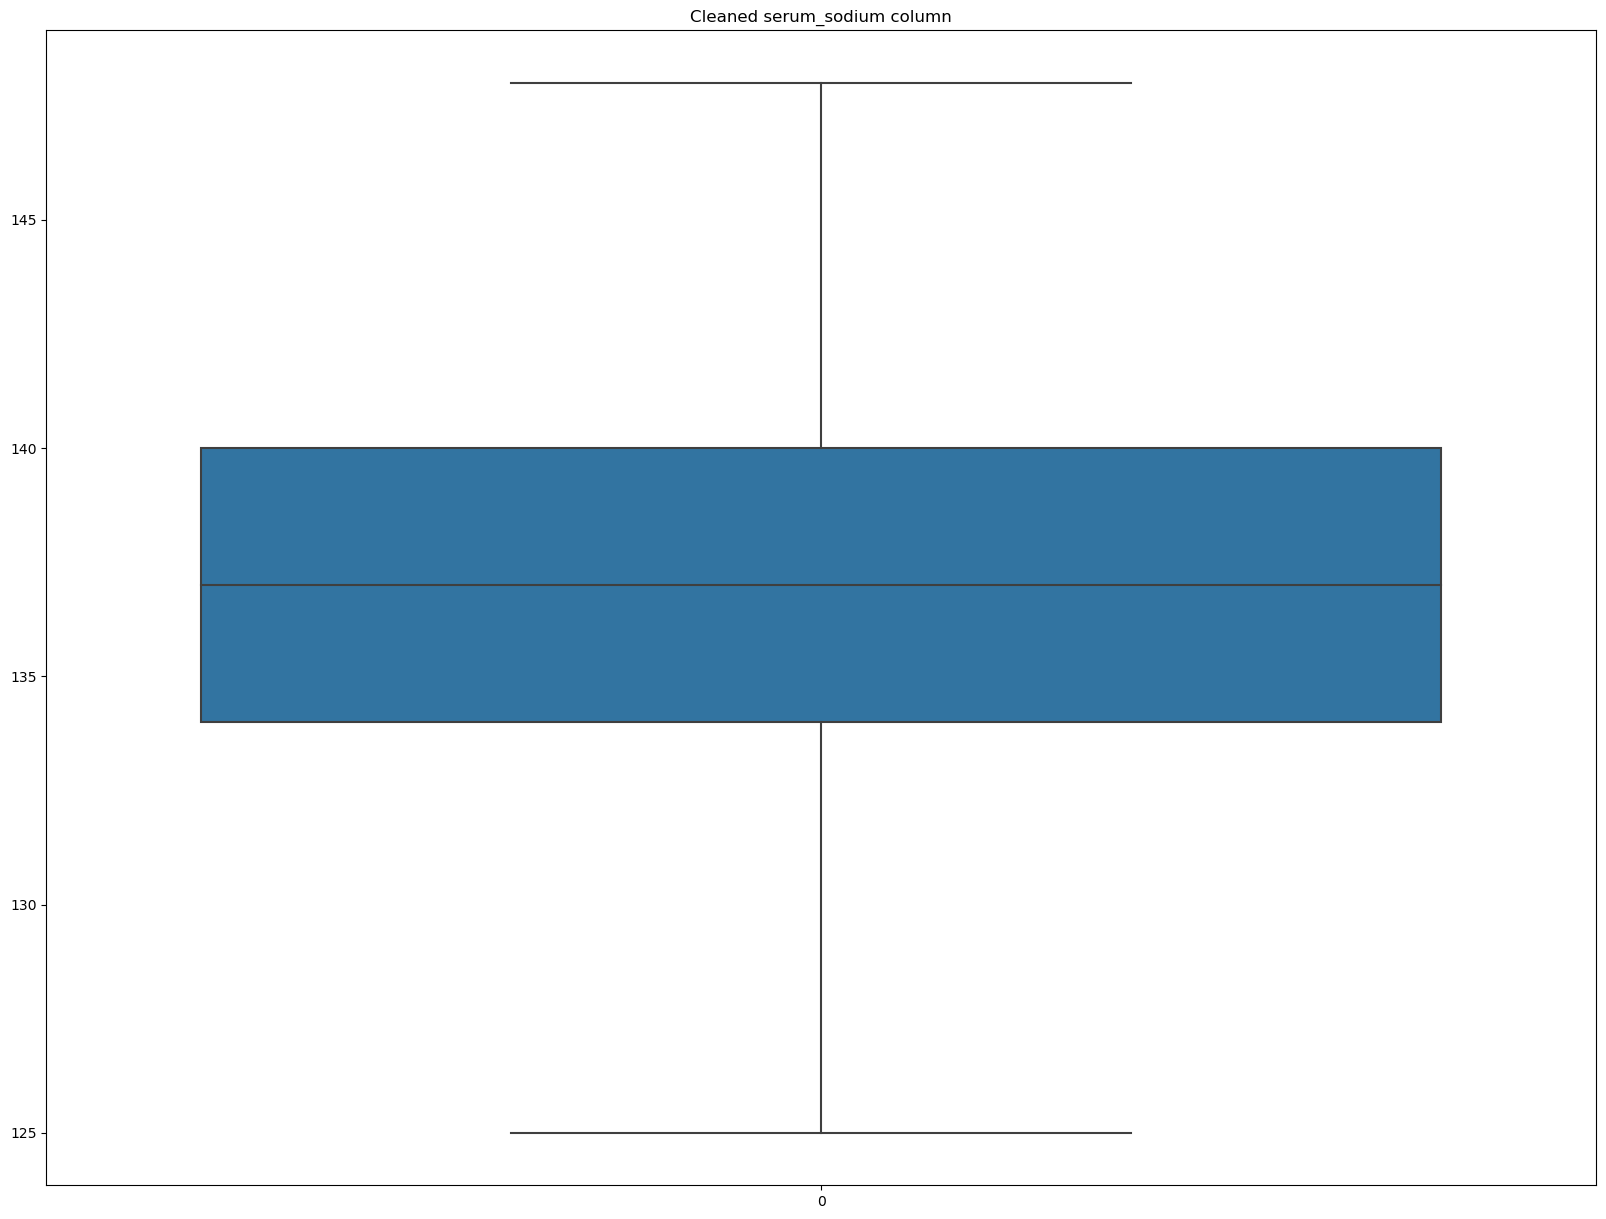

In [43]:
clean_data(df, 'serum_sodium')

### Dropping the time column

In [44]:
df.drop('time', axis=1, inplace=True)

## Exploring the cleaned data

In [45]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130.0,1,0,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136.0,1,0,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129.0,1,1,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137.0,1,0,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125.0,0,0,1
5,90.0,1,47.00,0,40.0,1,204000.00,2.10,132.0,1,1,1
6,75.0,1,246.00,0,15.0,0,127000.00,1.20,137.0,1,0,1
7,60.0,1,315.00,1,60.0,0,440000.00,1.10,131.0,1,1,1
8,65.0,0,157.00,0,65.0,0,263358.03,1.50,138.0,0,0,1
9,80.0,1,123.00,0,35.0,1,388000.00,2.15,133.0,1,1,1


### Feature set
Let's define feature sets, X:

In [46]:
X = df[['age', 'anaemia','creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine','serum_sodium', 'sex', 'smoking']].values  #.astype(float)
X[0:5]

array([[7.5000000e+01, 0.0000000e+00, 5.8200000e+02, 0.0000000e+00,
        2.0000000e+01, 1.0000000e+00, 2.6500000e+05, 1.9000000e+00,
        1.3000000e+02, 1.0000000e+00, 0.0000000e+00],
       [5.5000000e+01, 0.0000000e+00, 1.2802500e+03, 0.0000000e+00,
        3.8000000e+01, 0.0000000e+00, 2.6335803e+05, 1.1000000e+00,
        1.3600000e+02, 1.0000000e+00, 0.0000000e+00],
       [6.5000000e+01, 0.0000000e+00, 1.4600000e+02, 0.0000000e+00,
        2.0000000e+01, 0.0000000e+00, 1.6200000e+05, 1.3000000e+00,
        1.2900000e+02, 1.0000000e+00, 1.0000000e+00],
       [5.0000000e+01, 1.0000000e+00, 1.1100000e+02, 0.0000000e+00,
        2.0000000e+01, 0.0000000e+00, 2.1000000e+05, 1.9000000e+00,
        1.3700000e+02, 1.0000000e+00, 0.0000000e+00],
       [6.5000000e+01, 1.0000000e+00, 1.6000000e+02, 1.0000000e+00,
        2.0000000e+01, 0.0000000e+00, 3.2700000e+05, 2.1500000e+00,
        1.2500000e+02, 0.0000000e+00, 0.0000000e+00]])

What are our labels?

In [47]:
y = df['DEATH_EVENT'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

### Train Test Split

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (239, 11) (239,)
Test set: (60, 11) (60,)



## Normalize Data

Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [49]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Lets test and select the best Grid Search 
Recall that default C = 1

In [51]:
lr = LogisticRegression(max_iter = 10000, solver='liblinear')
C = [0.001,0.01,0.1,0.2,0.3,0.4,1.0]
scores = []
for choice in C:
    lr.set_params(C=choice)
    lr.fit(X_train,y_train)
    scores.append(lr.score(X_test,y_test))

print(scores)

[0.7333333333333333, 0.7666666666666667, 0.7833333333333333, 0.7833333333333333, 0.7666666666666667, 0.7666666666666667, 0.75]


We noticed that C = 0.1 is the highest score

In [58]:
LR = LogisticRegression(C=0.1,solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.1, solver='liblinear')

Now we can predict using our test set:

In [59]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.45024894, 0.54975106],
       [0.76662186, 0.23337814],
       [0.8600941 , 0.1399059 ],
       [0.68782391, 0.31217609],
       [0.59625133, 0.40374867]])

<h2 id="evaluation">Evaluation</h2>

In [61]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7636363636363637

In [62]:
## Lets Get the Score
LR.score(X_test,y_test)

0.7833333333333333

### Confusion Matrix

In [63]:
confusion_matrix = metrics.confusion_matrix(y_test, yhat)

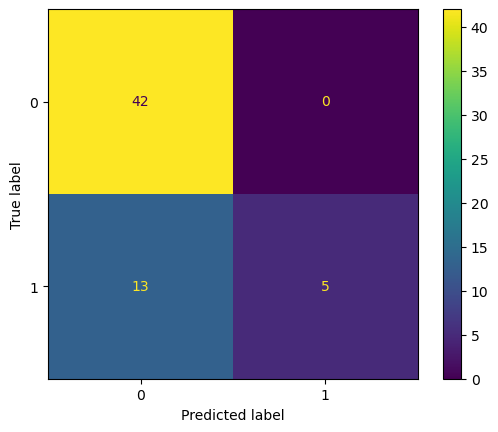

In [64]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0,1])
cm_display.plot()
plt.show()

In [65]:
## Accuracy
Accuracy = metrics.accuracy_score(y_test,yhat)
print("Accuracy: ", Accuracy)

Accuracy:  0.7833333333333333


In [66]:
## Precision
Precision = metrics.precision_score(y_test,yhat)
print("Precision: ", Precision)

Precision:  1.0


In [69]:
## Sensitivity
Sensitivity = metrics.recall_score(y_test,yhat)
print("Sensitivity: ", Sensitivity)

Sensitivity:  0.2777777777777778


In [70]:
## F1 Score
F1_score = metrics.f1_score(y_test,yhat)
print("F1 SCORE: ", F1_score)

F1 SCORE:  0.4347826086956522


### The Logistic Regression is a very Classification Model

## THANK YOU